<a href="https://colab.research.google.com/github/JohnPaul1278/PS0/blob/main/ps0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

In [ ]:
#download file from online and save in colab as ex1.csv; note it's from: https://conjointly.com/kb/correlation-statistic/
#urllib.request.urlretrieve("https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download", "ex1.csv")
#!wget -q -O ex1.csv https://drive.google.com/file/d/1KPinEn2h4tAYQqzGC_BLf_y7hhOBgBtO/view?usp=sharing

In [ ]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
csvfile.csv  ex1.csv  sample_data


In [20]:
dat=pd.read_csv('csvfile.csv') #read it in  ; or full path: '/content/ex1.csv'

In [23]:
dat.columns

Index(['PUBID', 'RA_CODE', 'Nkidcat', 'Agecat', 'TANFmon', 'TANFcat', 'empl3y',
       'Erelmon', 'Emoncat', 'agecat1',
       ...
       'S2HINCPCT', 'S2HEALTH1', 'S2HEALTH2', 'S2HEALTH3', 'S2HEALTH4',
       'S2HEALTH5', 'S2HLTHPROB', 'S2DISSCALE', 'S2SERDIS', 'S2BFPL'],
      dtype='object', length=331)

In [ ]:
dat.head(2)
dat.tail(2)

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6


,Person,Height,Self Esteem
18,19,63,3.4
19,20,61,3.6


In [24]:
dat

,PUBID,RA_CODE,Nkidcat,Agecat,TANFmon,TANFcat,empl3y,Erelmon,Emoncat,agecat1,...,S2HINCPCT,S2HEALTH1,S2HEALTH2,S2HEALTH3,S2HEALTH4,S2HEALTH5,S2HLTHPROB,S2DISSCALE,S2SERDIS,S2BFPL
0,1,2S,3,2,60,4,2,16,3,0,...,,,,,,,,,,
1,2,2S,1,2,38,3,4,9,2,0,...,,,,,,,,,,
2,3,3V,3,2,45,3,2,5,1,0,...,1,0,0,100,0,0,100,0,0,100
3,4,1T,4,1,30,3,1,,99,1,...,1,0,0,100,0,0,0,3,0,100
4,5,2S,1,1,8,1,3,2,1,1,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1938,2S,2,2,56,3,4,7,2,0,...,,,,,,,,,,
1938,1939,3V,1,1,20,2,1,,99,1,...,.689655172413793,100,0,0,0,0,0,10,0,100
1939,1940,2S,3,4,52,3,5,2,1,0,...,,,,,,,,,,
1940,1941,1T,2,4,51,3,2,14,3,0,...,1,0,0,0,100,0,100,0,0,100


In [25]:
dat["empl3y"][0:3] #subset or slice

0    2
1    4
2    2
Name: empl3y, dtype: int64

In [26]:
#keep it simple! especially when figuring things out! keep only vars needed, say 5 or 10
#dont have a dataset with 500vars--you won't use them! just clutter and mess!
#and then later whenever you need more vars, just rerun the code retaining more
dat[["empl3y","Nkidcat"]][0:3]

,empl3y,Nkidcat
0,2,3
1,4,1
2,2,3


In [27]:
# if data big take random sample! way better to learn and figure things out with small sample!!
# say frac=.1 for 10perc, or n=10 for 10obs
dat.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results;

,PUBID,RA_CODE,Nkidcat,Agecat,TANFmon,TANFcat,empl3y,Erelmon,Emoncat,agecat1,...,S2HINCPCT,S2HEALTH1,S2HEALTH2,S2HEALTH3,S2HEALTH4,S2HEALTH5,S2HLTHPROB,S2DISSCALE,S2SERDIS,S2BFPL
1094,1095,1T,0,2,60,4,4,5,1,0,...,,,,,,,,,,
793,794,2S,1,4,60,4,2,6,1,0,...,,,,,,,,,,
1093,1094,2S,1,1,6,1,5,0,1,1,...,,,,,,,,,,
736,737,3V,0,1,4,1,3,9,2,1,...,.714285714285714,0,0,0,100,0,0,2,0,0
1112,1113,1T,4,2,9,1,4,16,3,0,...,.35625,0,0,100,0,0,0,4,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,474,1T,1,2,35,3,5,,99,0,...,,,,,,,,,,
165,166,1T,1,3,46,3,2,1,1,0,...,1,0,0,100,0,0,0,6,0,100
845,846,2S,1,2,60,4,2,32,4,0,...,,,,,,,,,,
226,227,2S,2,3,20,2,4,31,4,0,...,,,,,,,,,,


In [28]:
dat["empl3y"].mean() # median, mode, stdev

4.307415036045314

In [29]:
dat["empl3y"].value_counts(dropna=False) #.nlargest(3) a tab or freq table

3     458
2     423
1     381
4     362
5     289
99     29
Name: empl3y, dtype: int64

<Axes: >

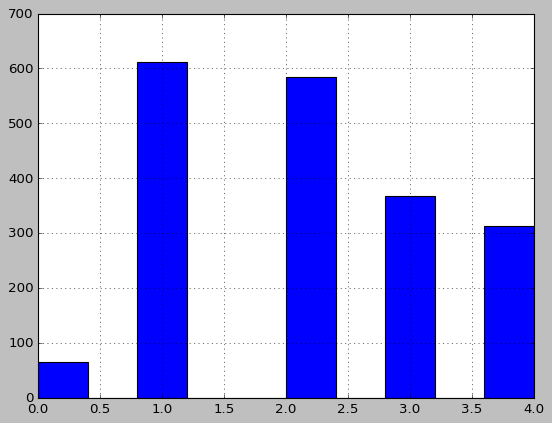

In [30]:
dat["Nkidcat"].hist() #again, always interpret all output

In [31]:
pd.crosstab(dat["empl3y"], dat["Nkidcat"]) #too many numbers for a crosstab!

Nkidcat,0,1,2,3,4
empl3y,,,,,
1,13,120,113,67,68
2,14,154,117,77,61
3,16,145,138,85,74
4,6,101,126,70,59
5,2,85,88,65,49
99,13,7,3,4,2


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='empl3y', ylabel='Nkidcat'>

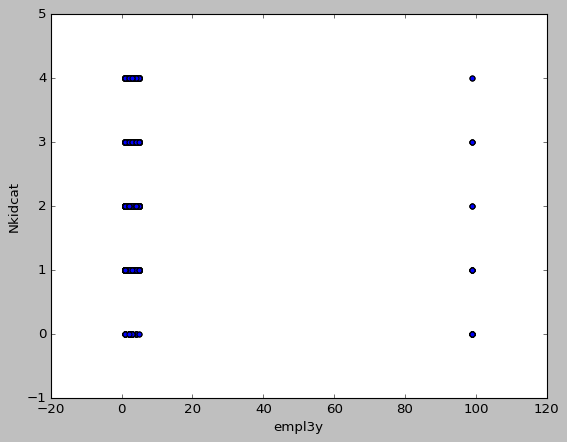

In [32]:
dat.plot(kind='scatter', y='Nkidcat', x='empl3y')

In [33]:
dat[['Nkidcat','empl3y']].corr().round(2)

,Nkidcat,empl3y
Nkidcat,1.0,-0.1
empl3y,-0.1,1.0
